# Wednesday, October 8th, 2025

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## [Project 3: Tartans](https://jllottes.github.io/Projects/tartans/tartans.html)

Last time, we worked through generating arrays for the vertical and horizontal stripes used to create a tartan pattern.

Pattern : 
> B14 K6 B6 K6 B6 K32 OG32

where the colors B, K, and OG are given by the RGB triples:

> B : [52, 80, 100]<br>
> K : [16, 16, 16]<br>
> OG : [92, 100, 40]

In [2]:
total_width = 14 + 6 + 6 + 6 + 6 + 32 + 32

vertical_stripes = np.zeros((total_width, total_width, 3), dtype=int)
vertical_stripes[:,:14] = (52, 80, 100)
vertical_stripes[:,14:20] = (16, 16, 16)
vertical_stripes[:,20:26] = (52, 80, 100)
vertical_stripes[:,26:32] = (16, 16, 16)
vertical_stripes[:,32:38] = (52, 80, 100)
vertical_stripes[:,38:70] = (16, 16, 16)
vertical_stripes[:,70:102] = (92, 100, 40)

horizontal_stripes = np.transpose(vertical_stripes, axes=[1,0,2])

Let's see what the `vertical_stripes` and `horiztonal_stripes` arrays look like:

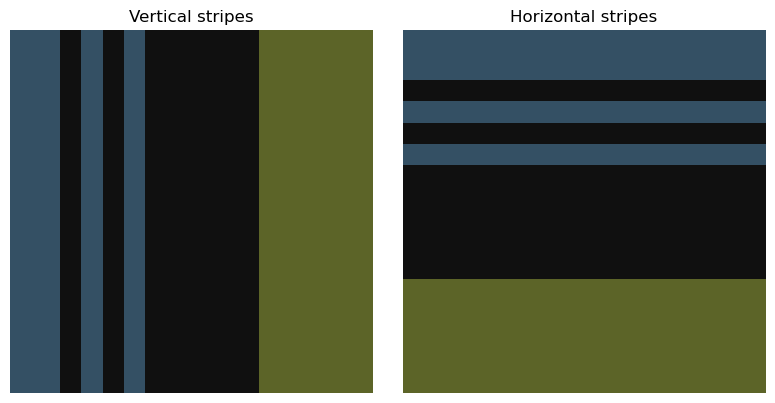

In [3]:
fig = plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(vertical_stripes)
plt.title('Vertical stripes')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(horizontal_stripes)
plt.title('Horizontal stripes')
plt.axis('off')

plt.tight_layout()

**Exercise:** Create a `checkerboard_tartan` array that combines the `vertical_stripes` and `horizontal_stripes` arrays in checkerboard pattern.

In [6]:
checkerboard_tartan = np.zeros((total_width, total_width, 3), dtype=int)

for row in range(total_width):
    for col in range(total_width):
        if row % 2 == 0:
            if col % 2 == 0:
                checkerboard_tartan[row,col] = vertical_stripes[row,col]
            else:
                checkerboard_tartan[row,col] = horizontal_stripes[row,col]
        else:
            if col % 2 == 0:
                checkerboard_tartan[row,col] = horizontal_stripes[row,col]
            else:
                checkerboard_tartan[row,col] = vertical_stripes[row,col]

In [8]:
checkerboard_tartan = np.zeros((total_width, total_width, 3), dtype=int)

for row in range(total_width):
    for col in range(total_width):
        if (row % 2 == 0 and col % 2 == 0) or (row % 2 == 1 and col % 2 == 1):
            checkerboard_tartan[row,col] = vertical_stripes[row,col]
        else:
            checkerboard_tartan[row,col] = horizontal_stripes[row,col]

In [10]:
checkerboard_tartan = np.zeros((total_width, total_width, 3), dtype=int)

for row in range(total_width):
    for col in range(total_width):
        if (row + col) % 2 == 0:
            checkerboard_tartan[row,col] = vertical_stripes[row,col]
        else:
            checkerboard_tartan[row,col] = horizontal_stripes[row,col]

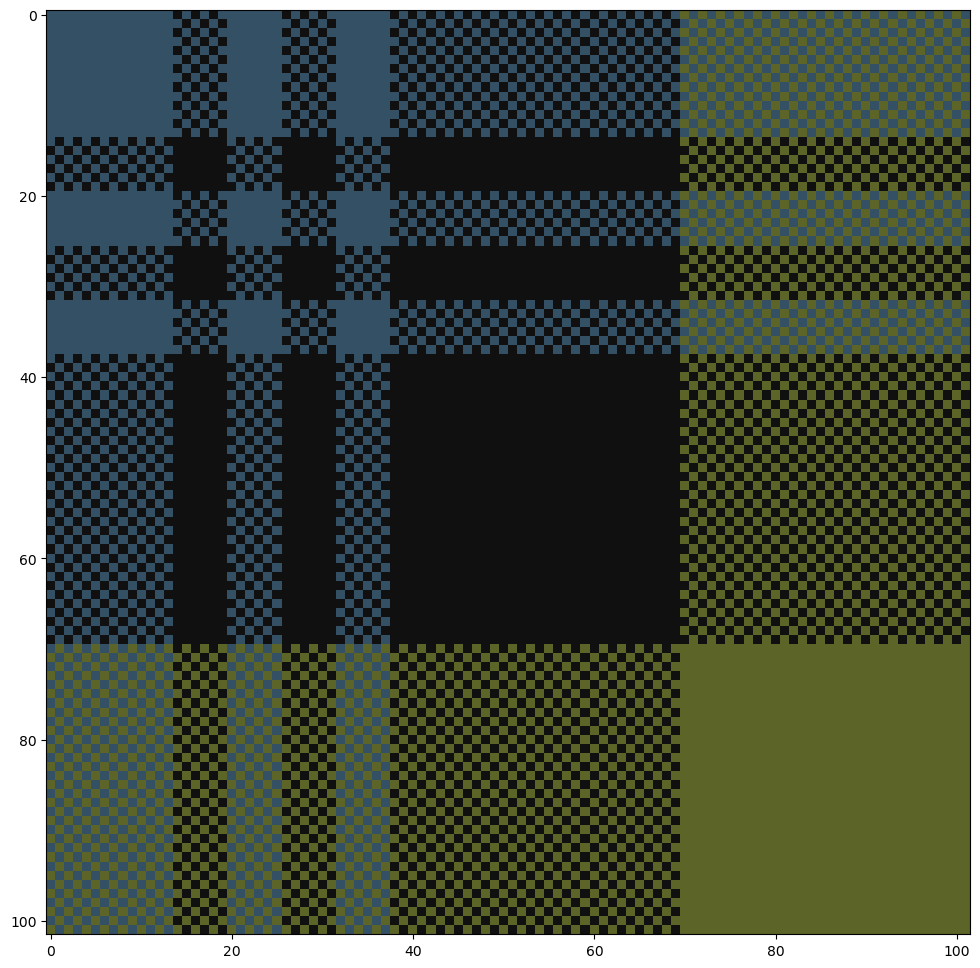

In [19]:
fig = plt.figure(figsize=(12,12))
plt.imshow(checkerboard_tartan)

### Generating the `vertical_stripes` array algorithmically

As mentioned last class, we would like to come up with a better way to generate the `vertical_stripes` array. That is, we don't want to have to manually define each stripe line-by-line, and we don't want to have to calculate appropriate slices by hand.

As a first step, let's focus on converting the given tartan pattern into something type of data that we can iterate through. 

Pattern : 
> B14 K6 B6 K6 B6 K32 OG32

where the colors B, K, and OG are given by the RGB triples:

> B : [52, 80, 100]<br>
> K : [16, 16, 16]<br>
> OG : [92, 100, 40]

Can we code this information as some sort of Python list(s)?

In [4]:
B = [52, 80, 100]
K = [16, 16, 16]
OG = [92, 100, 40]

colors = [B, K, B, K, B, K, OG]
widths = [14, 6, 6, 6, 6, 32, 32]

Can we find the total width of the pattern without manually adding the widths by hand?

In [5]:
total_width = sum(widths)
print(total_width)

102


With the total width calculated, we can intialize the `vertical_stripes` array that we will then fill with colored stripes.

**Exercise:** Use a `for` loop to iterate through each width/RGB pair and add the corresponding stripe to the `vertical_stripes` array.

In [ ]:
vertical_stripes = np.zeros((total_width, total_width, 3), dtype=int)



This is a huge improvement on our previous code. Can we do better? It would be nice if we could use Python to automatically process the "recipe" to generate the lists of widths and colors. We will talk next week about how to process strings in a way that will help with this task.

We also need to tackle the following challenges for the project:
 - We need to generate the more authentic tartan pattern described in the project page.
 - We need to repeat our tartan pattern to fill a `500` by `500` image.

## Boolean NumPy arrays

A Boolean array is just a NumPy array that contains `True` and `False` values. That is, the `dtype` of the array is `Bool`. We can easily contruct Boolean arrays using Boolean expressions with arrays.

In [20]:
a = np.arange(25).reshape(5,5)
print(a)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


In [21]:
print(a > 10)

[[False False False False False]
 [False False False False False]
 [False  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]


In [22]:
print(a % 3 == 1)

[[False  True False False  True]
 [False False  True False False]
 [ True False False  True False]
 [False  True False False  True]
 [False False  True False False]]


We can use logical operators on Boolean arrays:
 - `~` will negate a Boolean array (that is, `True` becomes `False` and vice-versa),
 - `&` works like `and` for two Boolean arrays, and
 - `|` works like `or` for two Boolean arrays.

In [23]:
~(a > 10)

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]])

In [24]:
print((a % 2 == 0) | ~(a > 10))

[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True False  True False  True]
 [False  True False  True False]
 [ True False  True False  True]]


### Boolean masks

One of the biggest strengths of using Boolean arrays is that they can be used as slicing tools for other arrays. For example, if `a` is an array (of any type) and `mask` is a Boolean array of the same shape, then `a[mask]` is a slice of the `a` array containing only the values where the corresponding value of `mask` is `True`.

We call this type of slicing *masking*, and the Boolean array the *mask*.

In [25]:
print(a)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


Suppose we want to identify the elements of the `a` array that have remainder `1` after division by `3`.

In [26]:
mask = (a % 3 == 1)
print(mask)

[[False  True False False  True]
 [False False  True False False]
 [ True False False  True False]
 [False  True False False  True]
 [False False  True False False]]


In [27]:
print(a[mask])

[ 1  4  7 10 13 16 19 22]


Note: When masking, the resulting array slice is flattened into a 1D array (regardless of the shape of the original array). However, since the changes to the slice propogate back to the original array, we can make changes to this slice while preserving the layout of the data in the original array.

For example, suppose we want to subtract `100` from each value of the `a` matrix which has remainder `1` after division by `3`.

In [28]:
a[mask] -= 100
print(a)

[[  0 -99   2   3 -96]
 [  5   6 -93   8   9]
 [-90  11  12 -87  14]
 [ 15 -84  17  18 -81]
 [ 20  21 -78  23  24]]


## Back to tartans: Masking (optional)

**Exercise:** Write a function `checkerboard_mask(n)` that takes in an integer `n` and constructs an `n` by `n` Boolean array that alternates `True`/`False` everytime you move through a row or column. For example, `checkerboard_mask(6)` should return an array that looks like:
$$
\begin{bmatrix} 
\text{True} & \text{False} & \text{True} & \text{False} & \text{True} & \text{False}
\\
\text{False} & \text{True} & \text{False} & \text{True} & \text{False} & \text{True}
\\
\text{True} & \text{False} & \text{True} & \text{False} & \text{True} & \text{False}
\\
\text{False} & \text{True} & \text{False} & \text{True} & \text{False} & \text{True}
\\
\text{True} & \text{False} & \text{True} & \text{False} & \text{True} & \text{False}
\\
\text{False} & \text{True} & \text{False} & \text{True} & \text{False} & \text{True}
\end{bmatrix}$$

In [29]:
def checkerboard_mask(n):
    mask = np.zeros((n,n),dtype=bool)
    for row in range(n):
        for col in range(n):
            if (row + col) % 2 == 0:
                mask[row,col] = True
            else:
                mask[row,col] = False
    return mask

In [40]:
def checkerboard_mask(n):
    pattern = np.array([[True, False],
                        [False,True]])
    mask = np.zeros((n,n),dtype=bool)
    for row in range(n):
        for col in range(n):
            mask[row,col] = pattern[row%2, col%2]
    return mask

In [41]:
print(checkerboard_mask(6))

[[ True False  True False  True False]
 [False  True False  True False  True]
 [ True False  True False  True False]
 [False  True False  True False  True]
 [ True False  True False  True False]
 [False  True False  True False  True]]


**Exercise:** Use a Boolean array generated by the `checkerboard_mask` function as a mask to create the checkerboard tartan pattern from the `vertical_stripes` and `horizontal_stripes` arrays.

In [42]:
total_width = vertical_stripes.shape[0]

checkerboard_tartan = np.zeros((total_width, total_width, 3), dtype=int)

vertical_mask = checkerboard_mask(total_width)
checkerboard_tartan[vertical_mask] = vertical_stripes[vertical_mask]

horizontal_mask = ~vertical_mask
checkerboard_tartan[horizontal_mask] = horizontal_stripes[horizontal_mask]

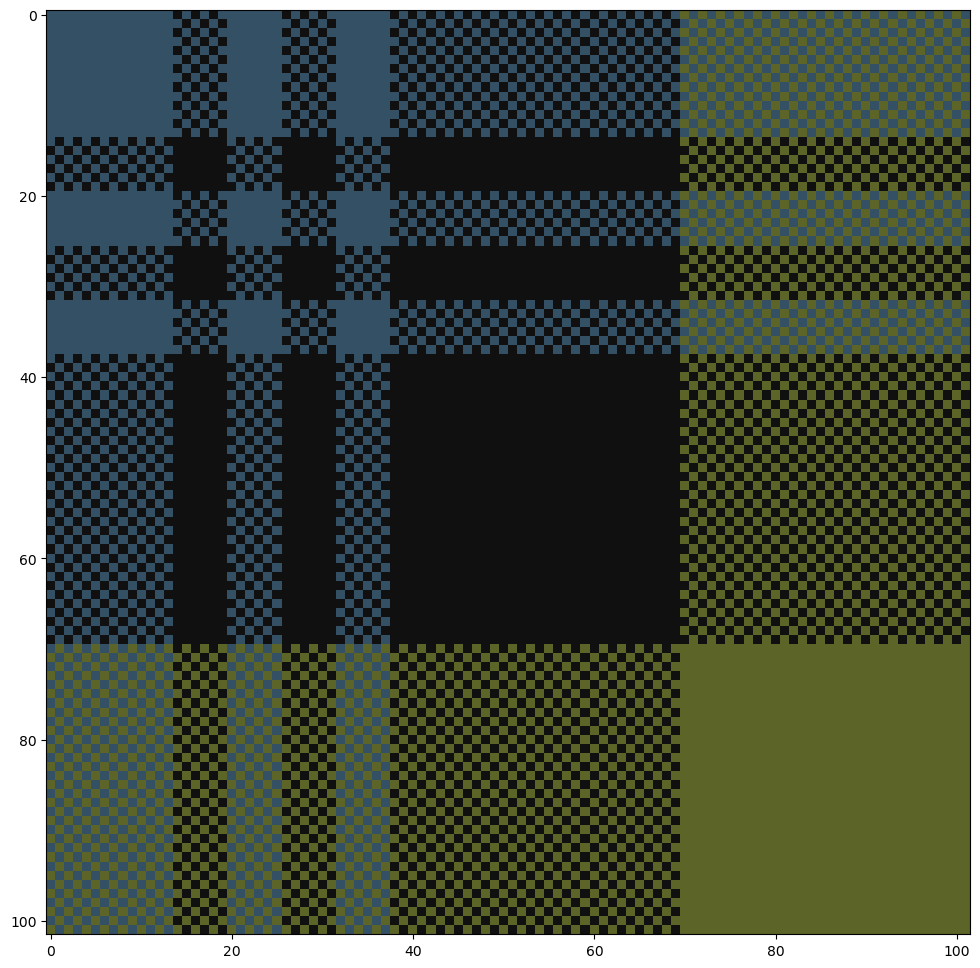

In [43]:
plt.figure(figsize=(12,12))
plt.imshow(checkerboard_tartan)

**Exercise:** Write a function `authentic_mask(n)` that takes in an integer `n` and constructs an `n` by `n` Boolean array consisting of the sequences:
 - `[True, True, False, False, True, True, False, ...]` in the first row,
 - `[False, True, True, False, False, True, True, ...]` in the second row,
 - `[False, False, True, True, False, False, True, ...]` in the third row,
 - `[True, False, False, True, True, False, False, ...]` in the fourth row,
 - ...

For example, `authentic_mask(6)` should return an array that looks like:
$$
\begin{bmatrix} 
\text{True} & \text{True} & \text{False} & \text{False} & \text{True} & \text{True}
\\
\text{False} & \text{True} & \text{True} & \text{False} & \text{False} & \text{True}
\\
\text{False} & \text{False} & \text{True} & \text{True} & \text{False} & \text{False}
\\
\text{True} & \text{False} & \text{False} & \text{True} & \text{True} & \text{False}
\\
\text{True} & \text{True} & \text{False} & \text{False} & \text{True} & \text{True}
\\
\text{False} & \text{True} & \text{True} & \text{False} & \text{False} & \text{True}
\end{bmatrix}$$

**Exercise:** Use a Boolean array generated by the `authentic_mask` function as a mask to create the authentic tartan pattern from the `vertical_stripes` and `horizontal_stripes` arrays.